In [1]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import warnings

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad("/home/augusta/SSS_mount/insituCNV/data/WTx-CosMx_TVA/snPATHO-seq/adata_snPATHOseq_B197.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 39075 × 15502
    obs: 'library', 'barcode', 'sid', 'sum', 'detected', 'subsets_mt_sum', 'subsets_mt_detected', 'subsets_mt_percent', 'total', 'sizeFactor', 'kid_lv1', 'lab_lv1', 'kid_lv2', 'lab_lv2', 'dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'gene_id', 'gene_symbol', 'chromosome', 'start', 'end', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'dataset_colors', 'hvg', 'lab_lv1_colors', 'lab_lv2_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'logcounts', 'raw'
   

#### Preprocessing

In [4]:
adata.layers['logtransformed'] = adata.layers['raw'].copy()

In [5]:
sc.pp.normalize_total(adata, layer = 'logtransformed')

In [6]:
sc.pp.log1p(adata, layer = 'logtransformed')

In [7]:
print(adata.layers['raw'])

  (0, 1)	1.0
  (0, 7)	3.0
  (0, 13)	7.0
  (0, 19)	1.0
  (0, 20)	2.0
  (0, 21)	1.0
  (0, 23)	3.0
  (0, 25)	2.0
  (0, 26)	8.0
  (0, 33)	3.0
  (0, 37)	2.0
  (0, 39)	2.0
  (0, 40)	2.0
  (0, 46)	1.0
  (0, 47)	1.0
  (0, 48)	4.0
  (0, 51)	1.0
  (0, 53)	1.0
  (0, 57)	1.0
  (0, 59)	2.0
  (0, 66)	1.0
  (0, 73)	1.0
  (0, 75)	1.0
  (0, 78)	1.0
  (0, 83)	1.0
  :	:
  (39074, 14609)	1.0
  (39074, 14643)	1.0
  (39074, 14650)	1.0
  (39074, 14663)	1.0
  (39074, 14689)	1.0
  (39074, 14705)	1.0
  (39074, 14715)	1.0
  (39074, 14724)	1.0
  (39074, 14738)	1.0
  (39074, 14777)	1.0
  (39074, 14787)	1.0
  (39074, 14799)	1.0
  (39074, 14831)	2.0
  (39074, 14835)	1.0
  (39074, 14846)	1.0
  (39074, 14873)	1.0
  (39074, 14920)	1.0
  (39074, 14936)	1.0
  (39074, 14977)	3.0
  (39074, 15000)	1.0
  (39074, 15026)	2.0
  (39074, 15046)	1.0
  (39074, 15081)	2.0
  (39074, 15485)	1.0
  (39074, 15495)	3.0


In [8]:
print(adata.layers['logtransformed'])

  (0, 1)	0.13890076553140607
  (0, 7)	0.36951333120874147
  (0, 13)	0.7144538285017645
  (0, 19)	0.13890076553140607
  (0, 20)	0.26084013887330804
  (0, 21)	0.13890076553140607
  (0, 23)	0.36951333120874147
  (0, 25)	0.26084013887330804
  (0, 26)	0.7848511309720636
  (0, 33)	0.36951333120874147
  (0, 37)	0.26084013887330804
  (0, 39)	0.26084013887330804
  (0, 40)	0.26084013887330804
  (0, 46)	0.13890076553140607
  (0, 47)	0.13890076553140607
  (0, 48)	0.4675257441776115
  (0, 51)	0.13890076553140607
  (0, 53)	0.13890076553140607
  (0, 57)	0.13890076553140607
  (0, 59)	0.26084013887330804
  (0, 66)	0.13890076553140607
  (0, 73)	0.13890076553140607
  (0, 75)	0.13890076553140607
  (0, 78)	0.13890076553140607
  (0, 83)	0.13890076553140607
  :	:
  (39074, 14609)	1.253874079720791
  (39074, 14643)	1.253874079720791
  (39074, 14650)	1.253874079720791
  (39074, 14663)	1.253874079720791
  (39074, 14689)	1.253874079720791
  (39074, 14705)	1.253874079720791
  (39074, 14715)	1.253874079720791
  (3

#### Infer CNV

In [26]:
# We provide all immune cell types as "normal cells".
cnv.tl.infercnv(
    adata,
    layer = 'logcounts',
    window_size=200,
    reference_key = 'dataset',
    reference_cat = ['imm', 'str']
)
# We provide immune and stromal cells as "normal cells".

100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:12<00:00,  1.50s/it]


#### Cluster cells based on their CNV profile

In [49]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)

cnv.tl.leiden(adata,resolution=0.3)

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [50]:
# cnv.tl.cnv_score(adata)

#### Plot CNV heatmaps

categories: 0, 1, 2, etc.
var_group_labels: chr1, chr2, chr3, etc.


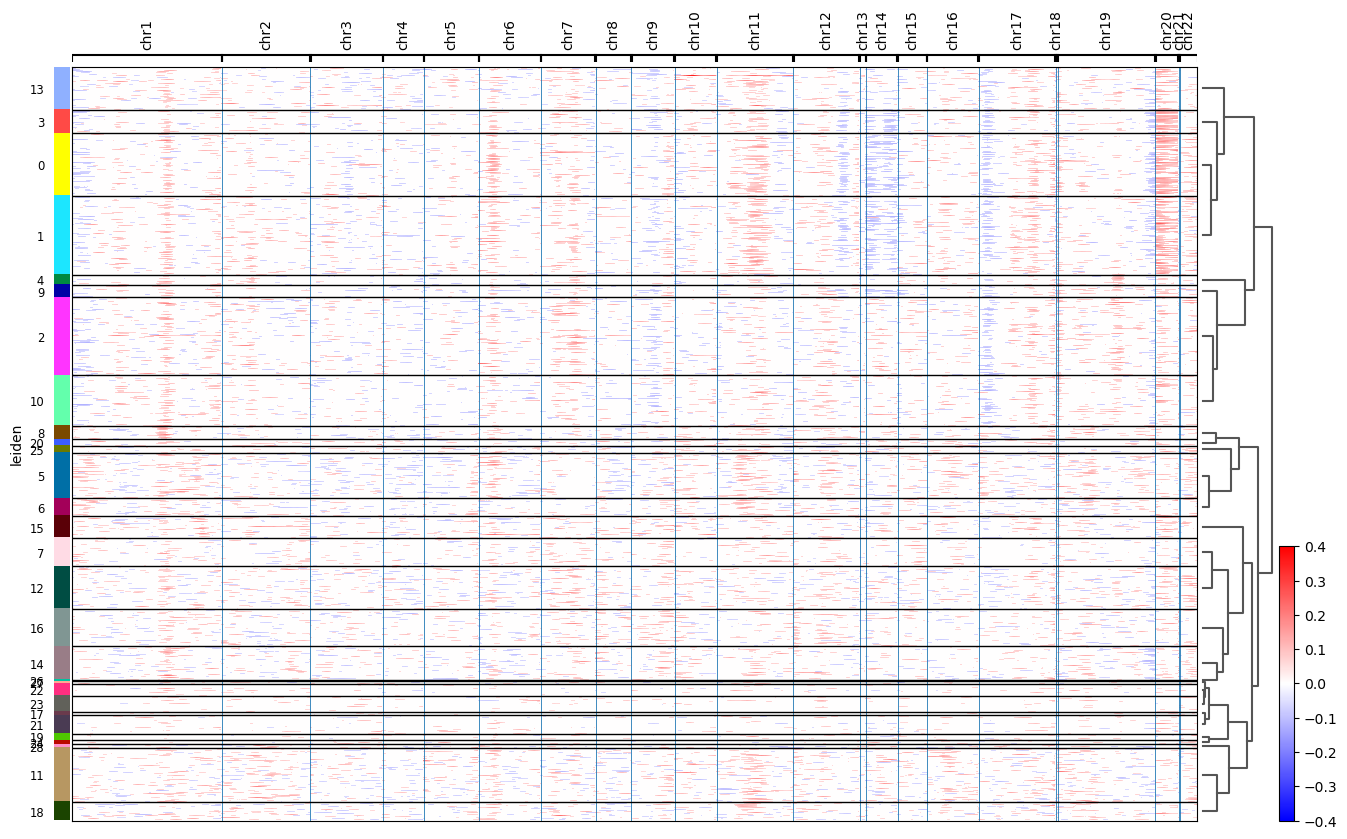

In [51]:
cnv.pl.chromosome_heatmap(adata, groupby="leiden", dendrogram=True, vmax = 0.4, vmin=-0.4)

categories: epi, imm, str
var_group_labels: chr1, chr2, chr3, etc.


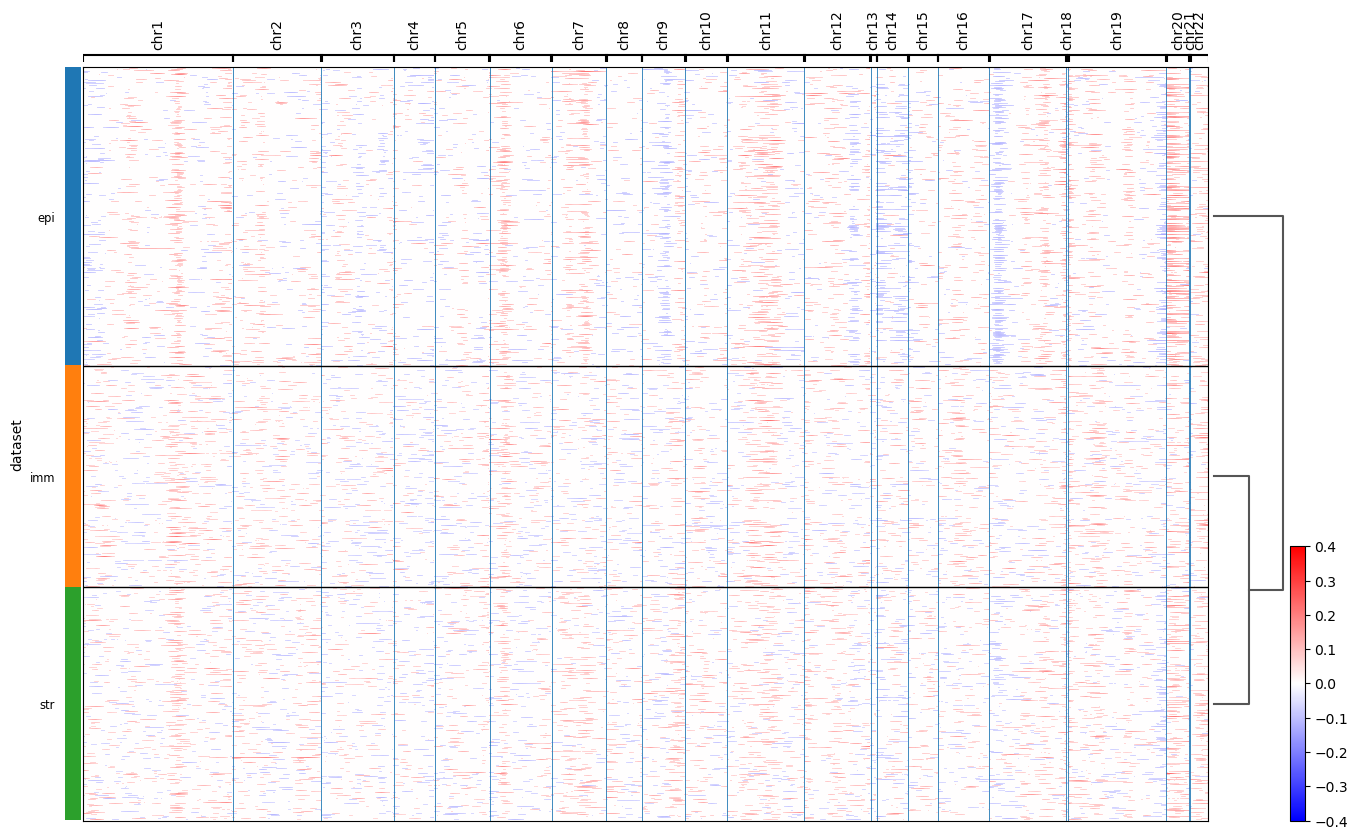

In [52]:
cnv.pl.chromosome_heatmap(adata, groupby="dataset", dendrogram=True, vmax = 0.4, vmin=-0.4)

In [53]:
sc.tl.dendrogram(adata, groupby ='cnv_leiden')

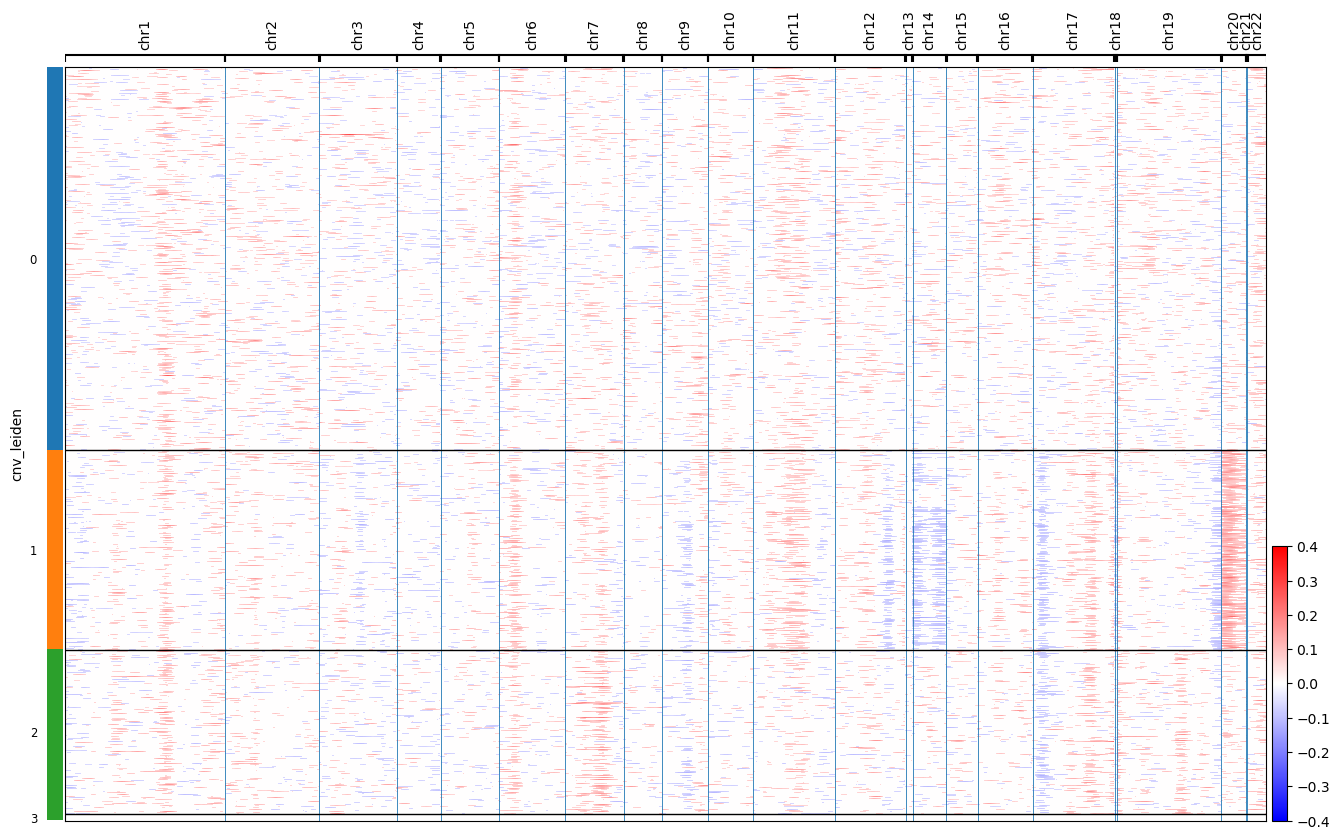

In [54]:
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden", dendrogram=False,  vmin=-0.4, vmax=0.4)

In [82]:
# Create a new column combining 'dataset' and 'cnv_leiden'
adata.obs['dataset_cnv_leiden'] = adata.obs['dataset'].astype(str) + "_" + adata.obs['cnv_leiden'].astype(str)

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/storage.py:85: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)
... storing 'dataset_cnv_leiden' as categorical


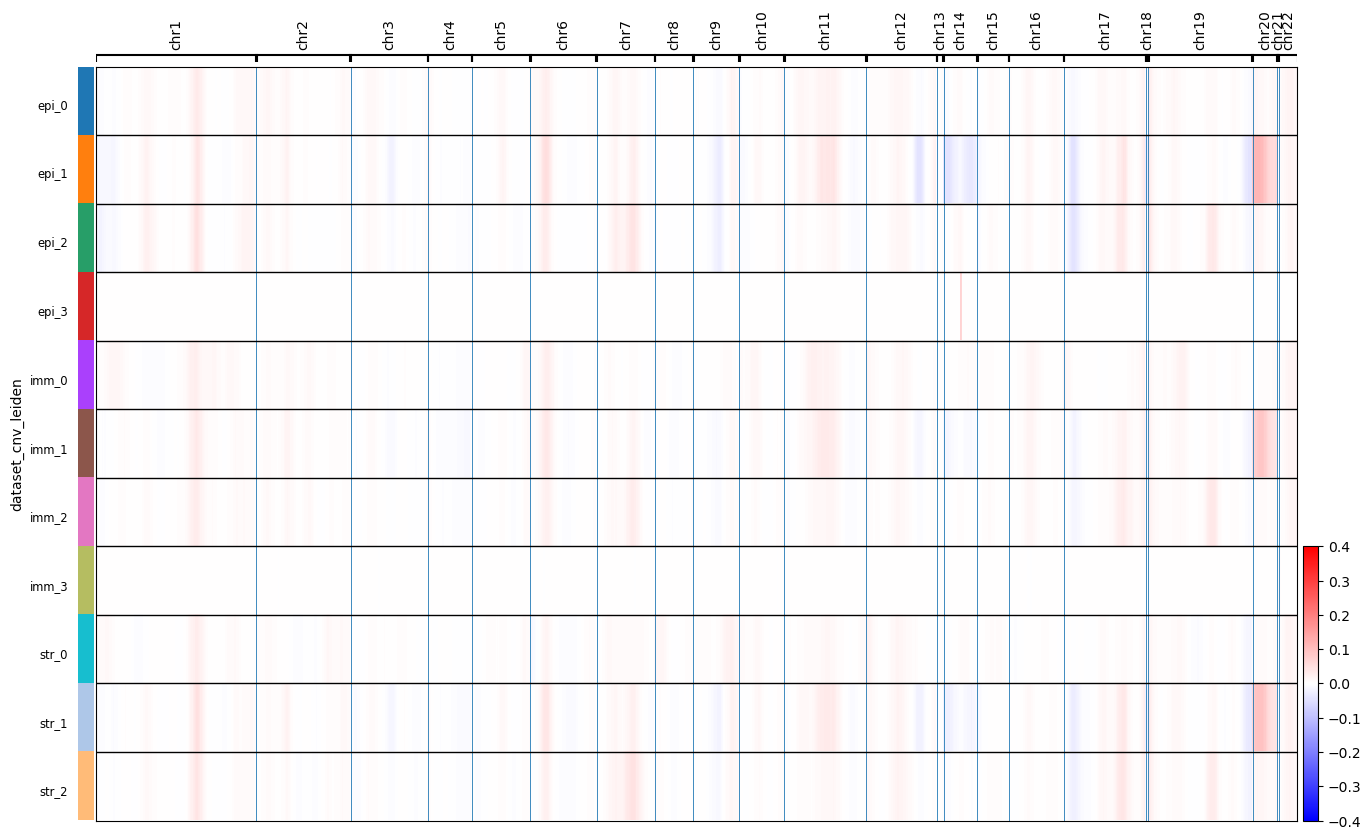

In [83]:
cnv.pl.chromosome_heatmap_summary(adata, groupby='dataset_cnv_leiden', dendrogram=False, vmin=-0.4, vmax=0.4)

In [72]:
adata[adata.obs['cnv_leiden'] != '3']

View of AnnData object with n_obs × n_vars = 38747 × 15502
    obs: 'library', 'barcode', 'sid', 'sum', 'detected', 'subsets_mt_sum', 'subsets_mt_detected', 'subsets_mt_percent', 'total', 'sizeFactor', 'kid_lv1', 'lab_lv1', 'kid_lv2', 'lab_lv2', 'dataset', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'cnv_leiden'
    var: 'gene_id', 'gene_symbol', 'chromosome', 'start', 'end', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'dataset_colors', 'hvg', 'lab_lv1_colors', 'lab_lv2_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'cnv', 'cnv_neighbors', 'cnv_leiden', 'dendrogram_leiden', 'dendrogram

In [67]:
len(adata[adata.obs['cnv_leiden'] == '2'])

8529

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/storage.py:85: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)
... storing 'cnv_leiden' as categorical


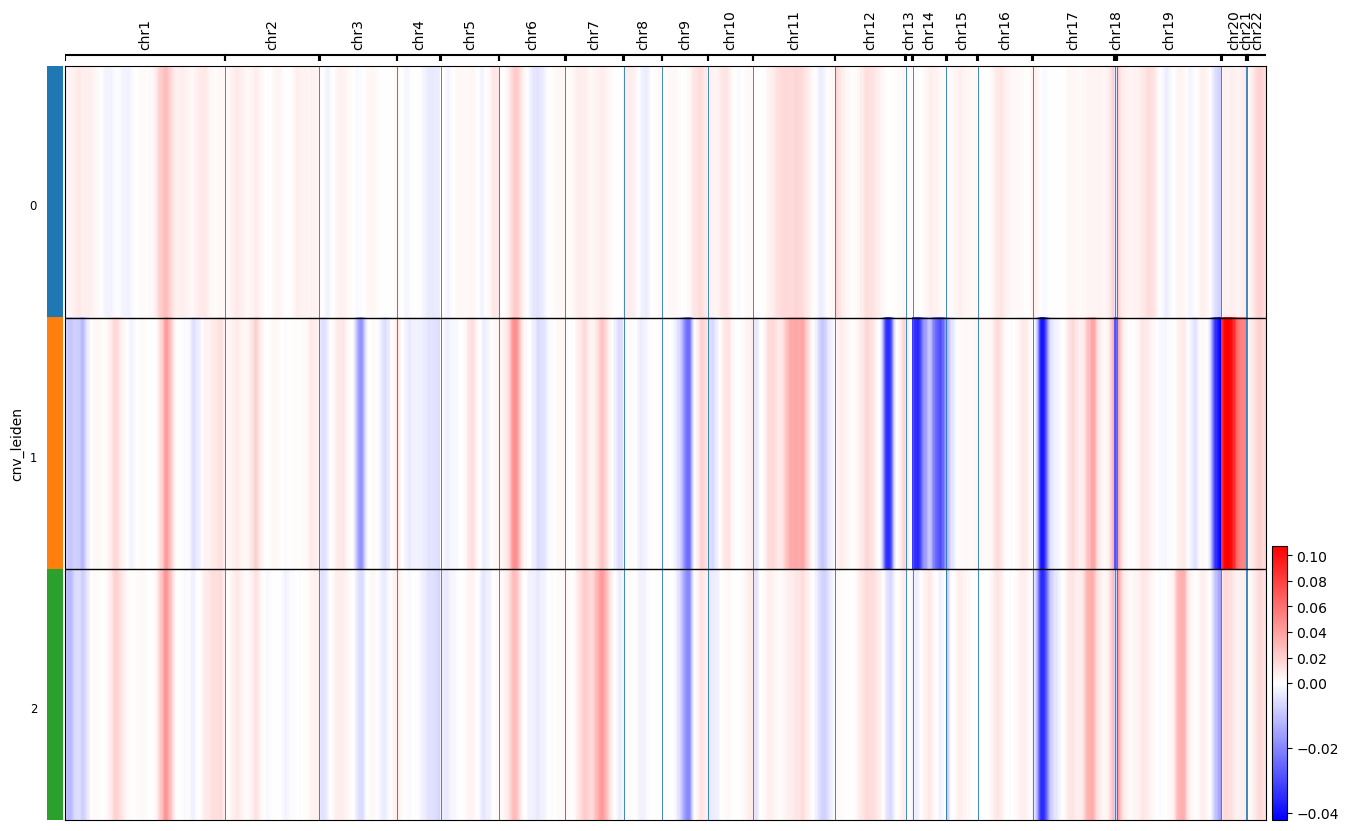

In [78]:
cnv.pl.chromosome_heatmap_summary(adata[adata.obs['cnv_leiden'] != '3'], groupby="cnv_leiden", dendrogram=False)

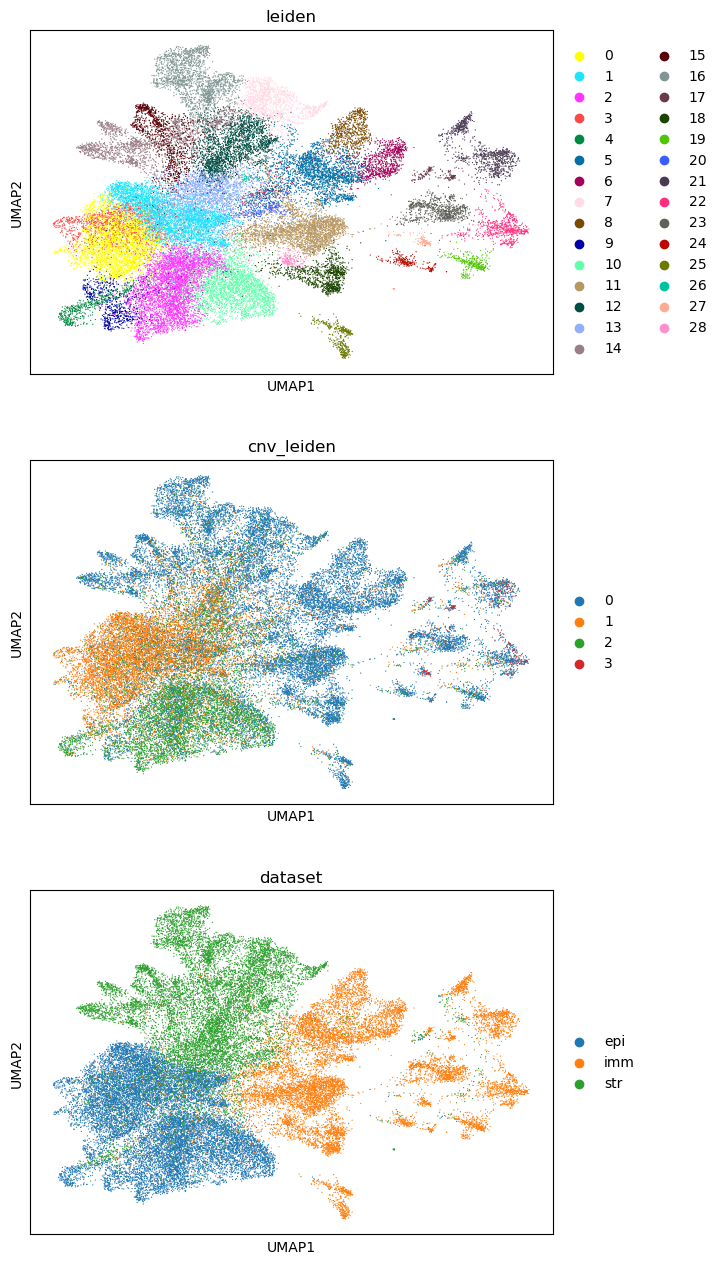

In [57]:
# raw
sc.pl.umap(adata, color = ['leiden', 'cnv_leiden', 'dataset'], ncols=1)